## Import Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [120]:
pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\ROG\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


## Import Data

In [174]:
df = pd.read_csv('int_prof.csv')
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [175]:
print('Shape of data is: %s entries and %s column'%(df.shape[0],df.shape[1]))

Shape of data is: 6901 entries and 20 column


## Data Preprocessing

In [176]:
print("All the columns in the dataset: " , df.columns)

All the columns in the dataset:  Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')


In [177]:
print("Numeric Columns in DF: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nCategorical Columns in DF: \n" , df.select_dtypes(include=['object']).columns.tolist())

Numeric Columns in DF: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']


Categorical Columns in DF: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


### No Missing Values

In [178]:
df.isnull().sum(axis=0)

Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Interested Type of Books               0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
Suggested Job Role                     0
dtype: int64

### Uniques Categorical Values in DF

In [179]:
cat_col = df[['self-learning capability?', 'Extra-courses did','reading and writing skills', 'memory capability score', 
                      'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 
                      'Introvert', 'interested career area ']]
for i in cat_col:
    print(df[i].value_counts(), end="\n\n")

yes    3496
no     3405
Name: self-learning capability?, dtype: int64

no     3529
yes    3372
Name: Extra-courses did, dtype: int64

excellent    2328
medium       2315
poor         2258
Name: reading and writing skills, dtype: int64

medium       2317
excellent    2303
poor         2281
Name: memory capability score, dtype: int64

yes    3501
no     3400
Name: Taken inputs from seniors or elders, dtype: int64

Management    3461
Technical     3440
Name: Management or Technical, dtype: int64

smart worker    3523
hard worker     3378
Name: hard/smart worker, dtype: int64

no     3470
yes    3431
Name: worked in teams ever?, dtype: int64

yes    3544
no     3357
Name: Introvert, dtype: int64

system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: interested career area , dtype: int64



- By using binary encoding, categorical features with yes or no can be easily converted to numerical values.

### To check data variety in Interested Type of Books columns

<AxesSubplot:xlabel='Interested Type of Books', ylabel='count'>

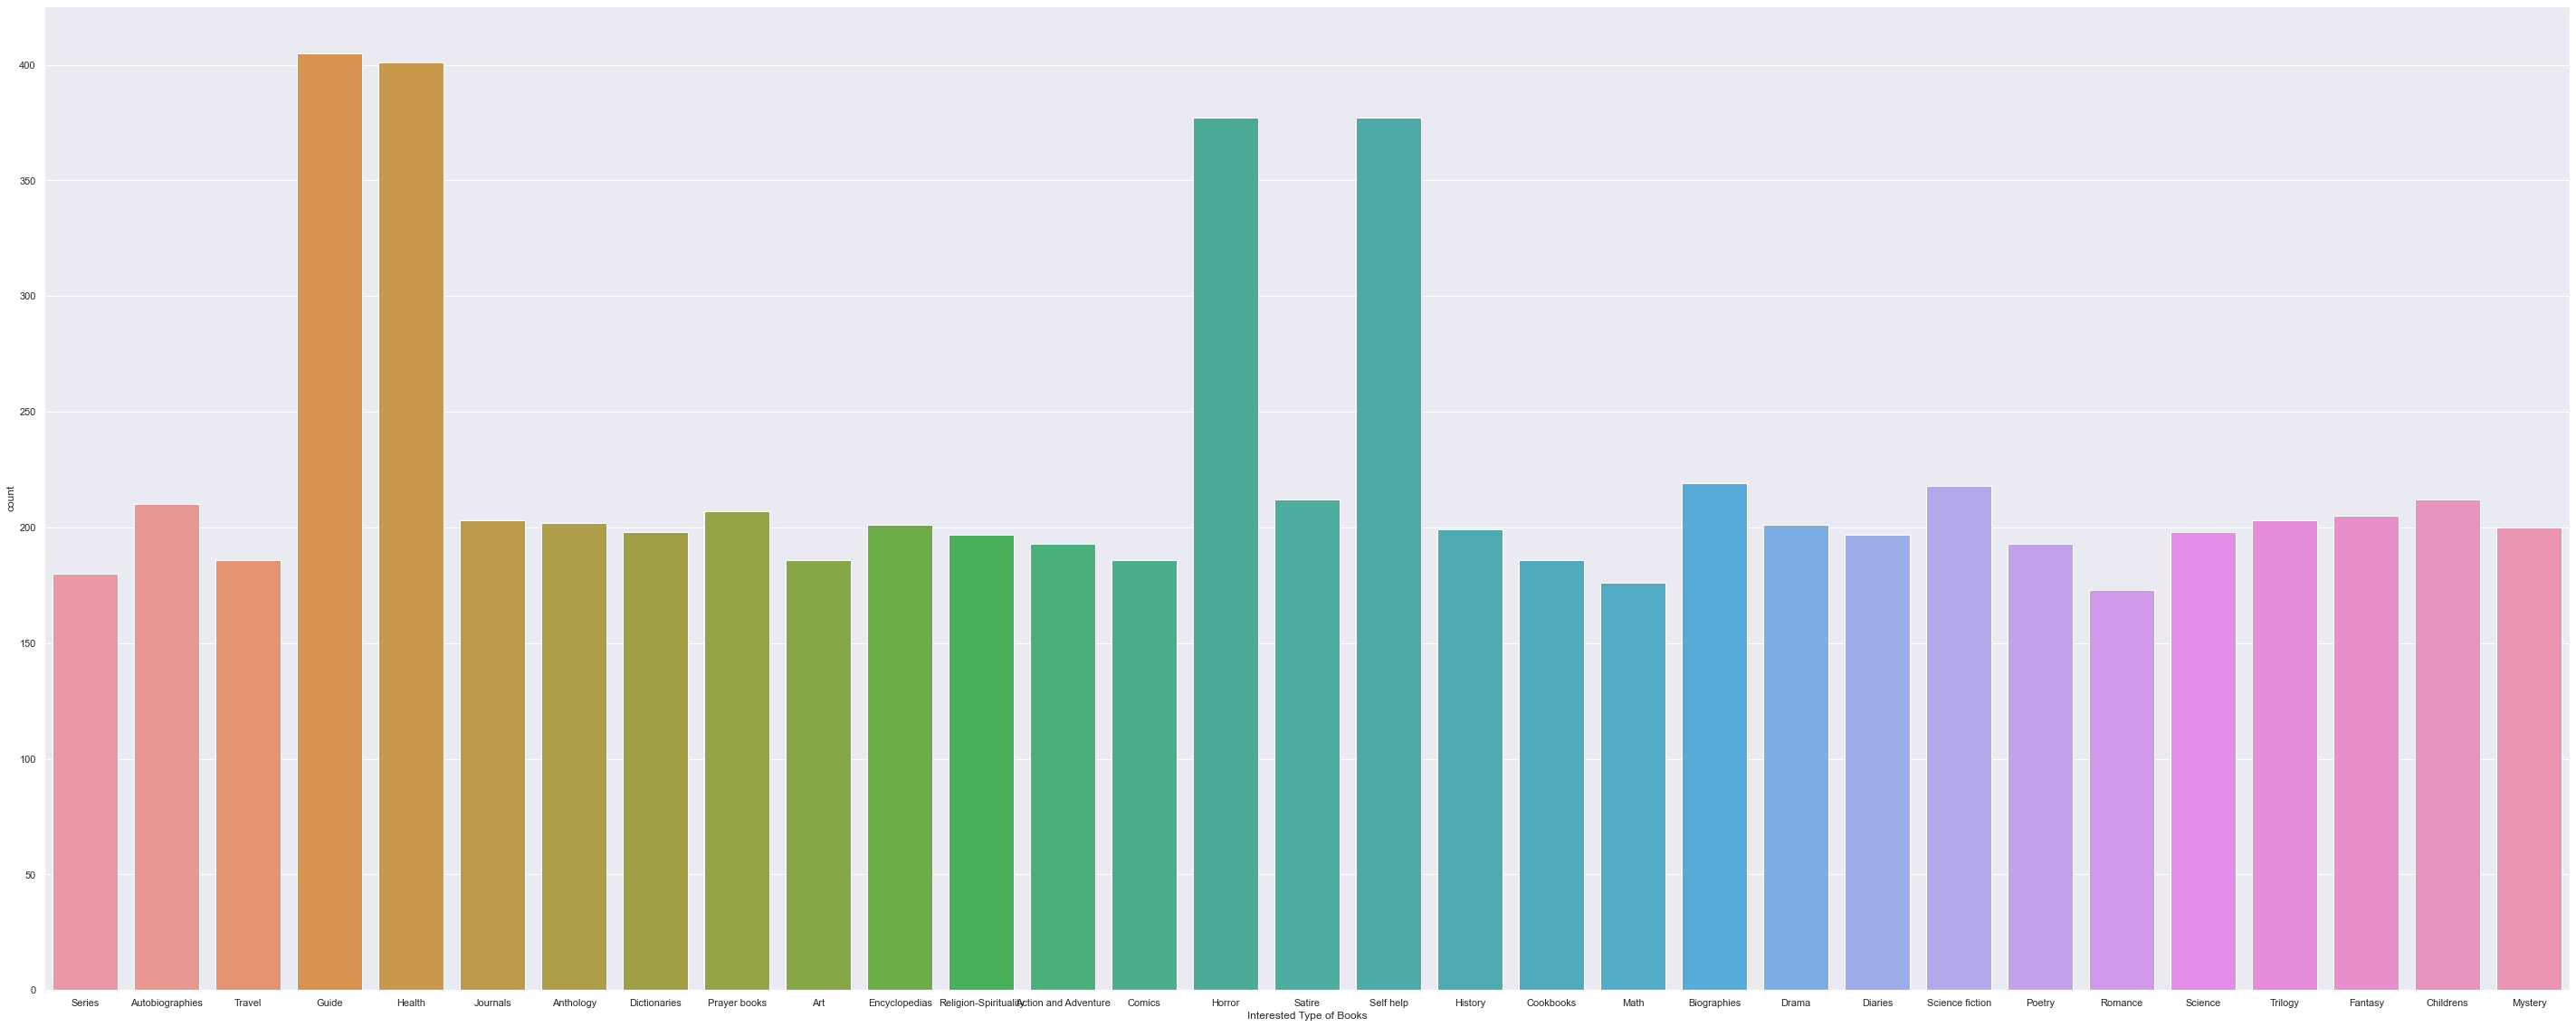

In [180]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x = df["Interested Type of Books"])

## EDA

### Corr Between Numerical Columns

<AxesSubplot:>

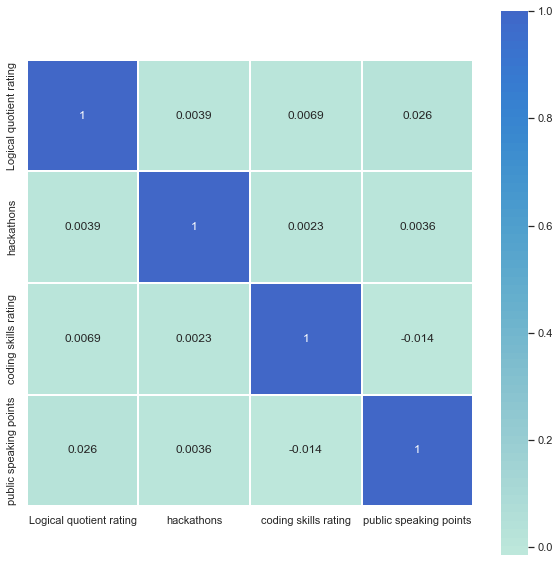

In [181]:
corr = df[['Logical quotient rating', 'hackathons', 
           'coding skills rating', 'public speaking points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

## Visualization for Categorical Values

In [182]:
print(df["Interested subjects"].value_counts())

Software Engineering     731
IOT                      722
cloud computing          721
programming              716
networks                 713
Computer Architecture    703
data engineering         672
hacking                  663
Management               644
parallel computing       616
Name: Interested subjects, dtype: int64


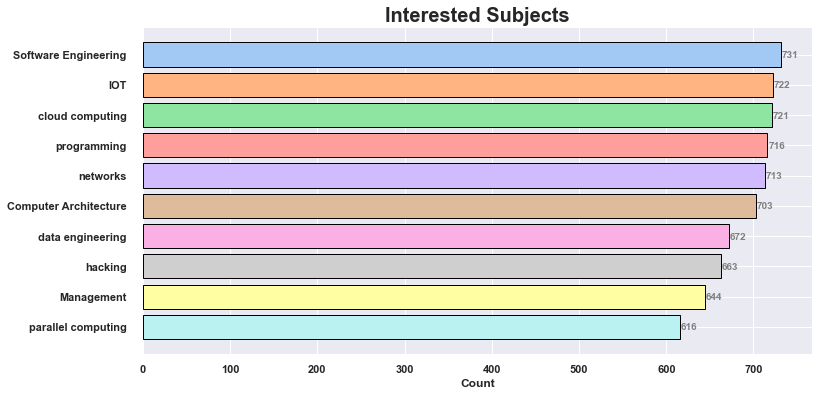

In [183]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Interested subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

##  Feature Selection & Engineering

### Binary Encoding for Categorical Variables

In [184]:
cols = df[["self-learning capability?","Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    df = df.replace(cleanup_nums)

In [185]:
print("\n\n Categorical Values: \n" , df.select_dtypes(include=['object']).columns.tolist())



 Categorical Values: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


### One Hot Encoding For Categorical values

In [186]:
mycol = df[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    df = df.replace(cleanup_nums)

cat_col = df[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 
                    'Interested Type of Books']]
for i in cat_col:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes

print("\n\nList of Categorical values: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical values: 
 ['Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [187]:
df.head(5)

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code
0,5,0,6,2,1,0,information security,testing,0,0,...,smart worker,1,0,Applications Developer,4,6,9,5,0,28
1,7,6,4,3,0,1,shell programming,testing,2,1,...,hard worker,0,1,Applications Developer,8,6,2,4,1,3
2,2,3,9,1,0,1,information security,testing,2,0,...,smart worker,0,0,Applications Developer,4,6,5,0,9,29
3,2,6,3,5,0,1,r programming,database security,2,0,...,smart worker,1,1,Applications Developer,7,2,7,5,7,13
4,2,0,3,4,1,0,distro making,game development,2,1,...,hard worker,1,0,Applications Developer,1,3,3,4,0,14


###  DV Encoding

In [188]:
print(df['Management or Technical'].unique())
print(df['hard/smart worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [189]:
df = pd.get_dummies(df, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"])
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,4,6,9,5,0,28,1,0,0,1
1,7,6,4,3,0,1,shell programming,testing,2,1,...,8,6,2,4,1,3,0,1,1,0
2,2,3,9,1,0,1,information security,testing,2,0,...,4,6,5,0,9,29,0,1,0,1
3,2,6,3,5,0,1,r programming,database security,2,0,...,7,2,7,5,7,13,1,0,0,1
4,2,0,3,4,1,0,distro making,game development,2,1,...,1,3,3,4,0,14,0,1,1,0


In [190]:
print("List of Numerical values: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical values: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'Extra-courses did', 'reading and writing skills', 'memory capability score', 'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code', 'A_Management', 'A_Technical', 'B_hard worker', 'B_smart worker']


## Machine Learning Models to get best accuracy

In [138]:
feed = df[['Logical quotient rating', 'coding skills rating', 'hackathons', 'public speaking points', 'self-learning capability?','Extra-courses did', 
           'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'reading and writing skills', 'memory capability score',  
           'B_hard worker', 'B_smart worker', 'A_Management', 'A_Technical', 'Interested subjects_code', 'Interested Type of Books_code', 'certifications_code', 
           'workshops_code', 'Type of company want to settle in?_code',  'interested career area _code',
             'Suggested Job Role']]

# Choosing independent vars
df_train_x = feed.drop('Suggested Job Role',axis = 1)

# Choosing all target vars
df_train_y = feed['Suggested Job Role']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)


### 1.Supprt Vector Machine (SVM)

In [193]:
from sklearn.svm import SVC
svm = svm.SVC()
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*10)

confusion matrics= [[ 1  5  0  6 41 20 18  6 15 12  6  2]
 [ 1  7  0  3 44  5 15 13  3  9  3  2]
 [ 0  5  2  5 44 14 19  9  6 10  6  3]
 [ 2  7  1  3 41 13  9  6  3 10  2  3]
 [ 2  7  3  4 40 17 18  9  4 13  1  3]
 [ 1 10  0  4 44 14 12 13  4  8  2  1]
 [ 1  6  3  2 40  7 13 17 12  8  4  3]
 [ 0  7  1  6 37 12 16 13 11 11  4  0]
 [ 0  9  0  3 37 13 14 13  6 12  2  5]
 [ 0  8  0  3 43 13 15  8  5 11  3  2]
 [ 1  8  1  3 40 16 18 12  4 10  4  2]
 [ 2  9  6  2 33 13 10 12 10  9  2  1]]
  
accuracy= 0.8327299058653149


In [194]:
ynewclass = svm.predict(userdata)
ynew = svm.decision_function(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Software Engineer']
Probabilities of all classes:  [[ 0.72317165  8.25769355 -0.2843185   7.17416306  3.83458056  4.87344345
  10.27976749  9.2644453   1.73122697  7.04310678 10.27669569  2.77294512]]
Probability of Predicted class :  10.279767490035844


C:\Users\ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### **(3) Random Forest Classifier**

In [195]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(x_train, y_train)
rfc_y_pred = rf.predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("confusion matrics=",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy*10)

confusion matrics= [[ 9 13 16  3 10 14 13 13 12  9 12  8]
 [ 8 13  9  7 19  8  5  7  4 10  8  7]
 [11 10  6 12 15  9 12 12 11  8  8  9]
 [ 9  8  5 13 25  4  6  6  7  6  4  7]
 [11 13 12  8 17  9  8  4 10  8 12  9]
 [ 6  8 12  6 18  6  4 12  9  7 14 11]
 [ 8  8 10 10 21  6 13  9 11  7  7  6]
 [11  8  9  8 21 11 13  8  8  7  6  8]
 [ 7 12 10  5 16 18 12  8 10  5  5  6]
 [ 6 10 14  6  9 12 12  9  9 10  5  9]
 [10 12 10  9 12  9 20  7  6 11  9  4]
 [10  9 11  8 14 11  9  8  7  7  8  7]]
  
accuracy= 0.8761766835626359


In [196]:

ynewclass = rf.predict(userdata)
ynew = rf.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Web Developer']
Probabilities of all classes:  [[0.02 0.12 0.09 0.03 0.12 0.07 0.12 0.06 0.07 0.1  0.07 0.13]]
Probability of Predicted class :  0.13


C:\Users\ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 3. Decision Tree


In [191]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[11 11 11  8 13 15 12 10  7 10 14 10]
 [10  4  6  8  5  7 11 13 17  7  8  9]
 [13  9 11  8 12 10 11 12  5 10  8 14]
 [ 5 10 12  7  5  8  6 10  4  7 14 12]
 [ 8 11  9 12 14 10  6  8  7  9 16 11]
 [12 13  8  9 13 12  4  7 11 10 11  3]
 [ 8 15 12  9  9  7 15  7  7 11 11  5]
 [10  9  7  3 14 11 18 11 15  8  6  6]
 [11  7 10 13  7 12 12  8  7  6  7 14]
 [ 9 10 10  8 18  8  7  6  9  9 11  6]
 [ 7 14  5 13  9 10 11  9  9 10 12 10]
 [ 9 10  9 15 10  9  7  5 14  7  6  8]]
  
accuracy= 0.8761766835626359


### Predicting to find the best accuracy

In [192]:
userdata = [['7','6','6','8','3','5','4', '4', '7', '3', '3', '6','8', 
                    '7','5','7','4','5','6','8','8']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Technical Support']
Probabilities of all classes:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Probability of Predicted class :  1.0


C:\Users\ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ROG\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## The Best Accuraccy was with decision tree , hence we are going to use decision tree as our prediction model in the interest profiler

In [197]:
import pickle 
pickle.dump(dtree,open('predict.pkl','wb'))